In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_excel(r"D:\Project-1\HATSUN SALES.xlsx")


In [3]:
#df['date'] = (df['date']).astype('str')
df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')

In [4]:
df.rename(columns = {'DATE' : 'date','SALES' : 'sales' }
          ,inplace = True)

In [5]:
# df['date'] = df['date'].dt.strftime('%Y-%m-%d')
df.dtypes

date     datetime64[ns]
sales           float64
dtype: object

In [6]:
df.set_index('date',inplace = True)
df

,sales
date,
2014-03-31,642.07
2014-06-30,702.34
2014-09-30,744.17
2014-12-31,712.17
2015-03-31,769.87
2015-06-30,865.27
2015-09-30,851.10
2015-12-31,829.43
2016-03-31,892.05


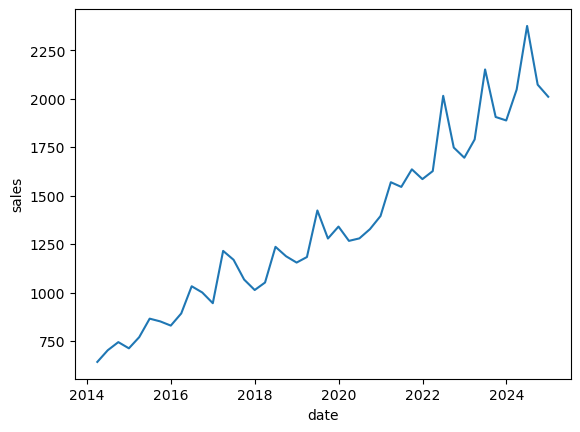

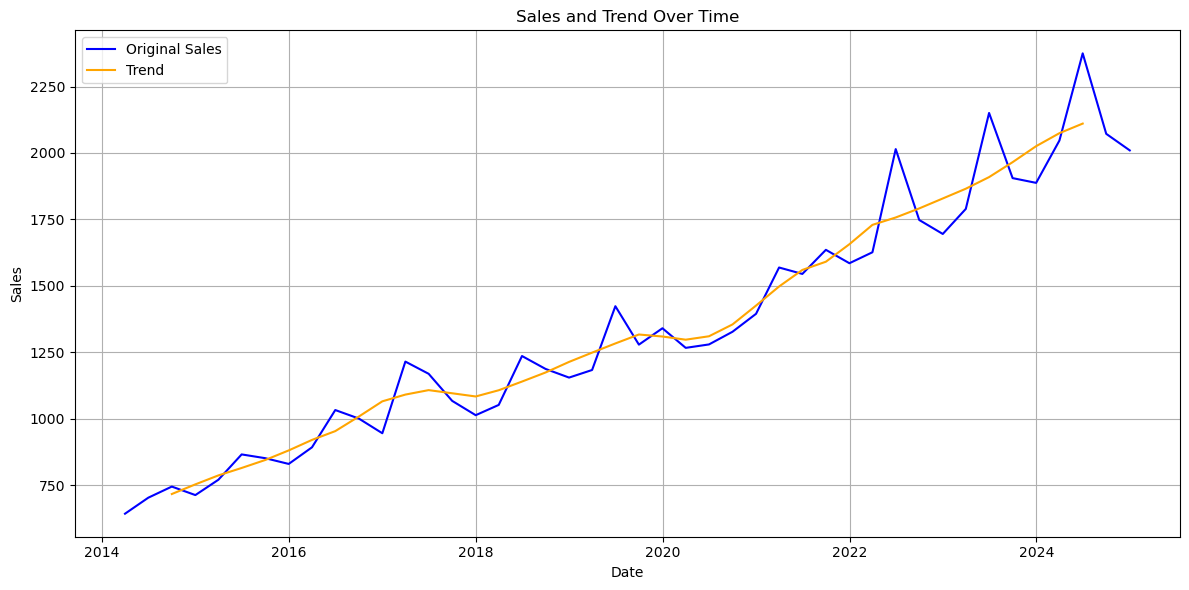

In [7]:
sns.lineplot(data = df,x=df.index,y='sales')
decomp = seasonal_decompose(df['sales'], model='additive')
df['trend'] = decomp.trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='sales', label='Original Sales', color='blue')
sns.lineplot(data=df, x=df.index, y='trend', label='Trend', color='orange')
plt.title('Sales and Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
df['rollmean'] = df.sales.rolling(window = 4).mean()
df['rollstd'] = df.sales.rolling(window = 4).std()
df.head(10)

,sales,trend,rollmean,rollstd
date,,,,
2014-03-31,642.07,NaN,NaN,NaN
2014-06-30,702.34,NaN,NaN,NaN
2014-09-30,744.17,716.16250,NaN,NaN
2014-12-31,712.17,752.50375,700.1875,42.662699
2015-03-31,769.87,786.23625,732.1375,30.849715
2015-06-30,865.27,814.26000,772.8700,65.967012
2015-09-30,851.10,844.19000,799.6025,71.862546
2015-12-31,829.43,880.34250,828.9175,42.033469
2016-03-31,892.05,919.87500,859.4625,26.252331


<function matplotlib.pyplot.show(close=None, block=None)>

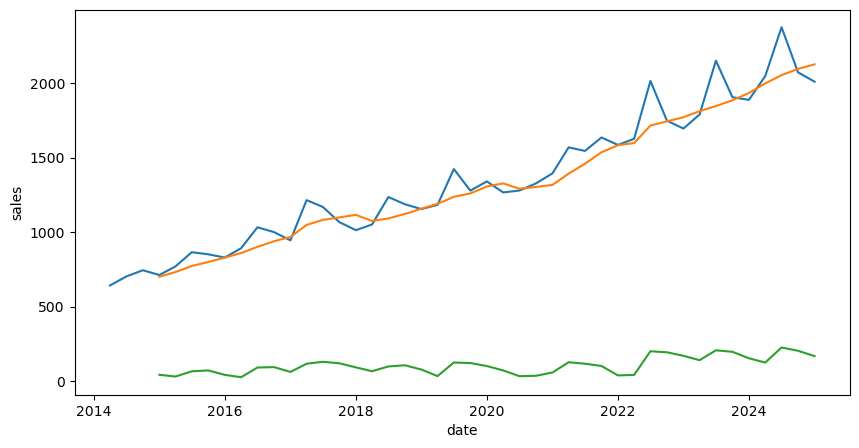

In [9]:
plt.figure(figsize = (10,5))
sns.lineplot(data = df,x=df.index,y = 'sales')
sns.lineplot(data = df,x=df.index,y = 'rollmean')
sns.lineplot(data = df,x=df.index,y = 'rollstd')
plt.show

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
df_cleaned = df.dropna(subset=['rollmean', 'rollstd', 'sales'])
adftest = adfuller(df_cleaned['sales'],autolag = 'AIC')
adftest

(1.0032394249558938,
 0.9943000109224931,
 3,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 374.60807053032244)

In [12]:
stats = pd.Series(adftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
stats

Test Statistic                  1.003239
p-value                         0.994300
#lags used                      3.000000
number of observations used    37.000000
dtype: float64

In [13]:
#data is staionary
for key,values in adftest[4].items():
    print('criticality',key,":",values)

criticality 1% : -3.6209175221605827
criticality 5% : -2.9435394610388332
criticality 10% : -2.6104002410518627


In [14]:
def test_stationarity(dataframe,var):
    dataframe['rollmean'] = dataframe[var].rolling(window = 4).mean()
    dataframe['rollstd'] = dataframe[var].rolling(window = 4).std()

    from statsmodels.tsa.stattools import adfuller
    adftest = adfuller(dataframe[var],autolag = 'AIC')
    stats = pd.Series(adftest[0:4],index=['Test Statistic','p-value','#lags used',
                                          'number of observations used'])
    print(stats)
    for key,values in adftest[4].items():
        print('criticality',key,":",values)
    sns.lineplot(data = dataframe,x=dataframe.index,y = var)
    sns.lineplot(data = dataframe,x=dataframe.index,y = 'rollmean')
    sns.lineplot(data = dataframe,x=dataframe.index,y = 'rollstd')

Test Statistic                  0.978923
p-value                         0.994039
#lags used                      3.000000
number of observations used    40.000000
dtype: float64
criticality 1% : -3.6055648906249997
criticality 5% : -2.937069375
criticality 10% : -2.606985625


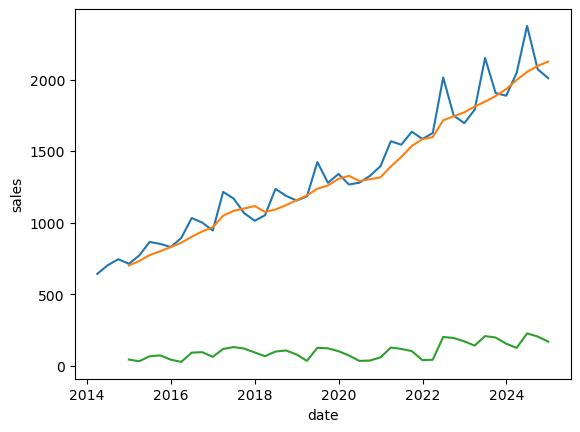

In [15]:
test_stationarity(df,'sales')

In [16]:
air_df = df[['sales']]
air_df.head()

,sales
date,
2014-03-31,642.07
2014-06-30,702.34
2014-09-30,744.17
2014-12-31,712.17
2015-03-31,769.87


In [17]:
air_df['shift'] = air_df.sales.shift(1)
air_df['shiftdiff'] = air_df['sales'] - air_df['shift']
air_df.head(15)

C:\Users\pavan kumar\AppData\Local\Temp\ipykernel_17960\192060959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift'] = air_df.sales.shift(1)
C:\Users\pavan kumar\AppData\Local\Temp\ipykernel_17960\192060959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shiftdiff'] = air_df['sales'] - air_df['shift']


,sales,shift,shiftdiff
date,,,
2014-03-31,642.07,NaN,NaN
2014-06-30,702.34,642.07,60.27
2014-09-30,744.17,702.34,41.83
2014-12-31,712.17,744.17,-32.00
2015-03-31,769.87,712.17,57.70
2015-06-30,865.27,769.87,95.40
2015-09-30,851.10,865.27,-14.17
2015-12-31,829.43,851.10,-21.67
2016-03-31,892.05,829.43,62.62


C:\Users\pavan kumar\AppData\Local\Temp\ipykernel_17960\3629385525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollmean'] = dataframe[var].rolling(window = 4).mean()
C:\Users\pavan kumar\AppData\Local\Temp\ipykernel_17960\3629385525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollstd'] = dataframe[var].rolling(window = 4).std()


Test Statistic                -9.532583e+00
p-value                        2.864409e-16
#lags used                     2.000000e+00
number of observations used    4.000000e+01
dtype: float64
criticality 1% : -3.6055648906249997
criticality 5% : -2.937069375
criticality 10% : -2.606985625


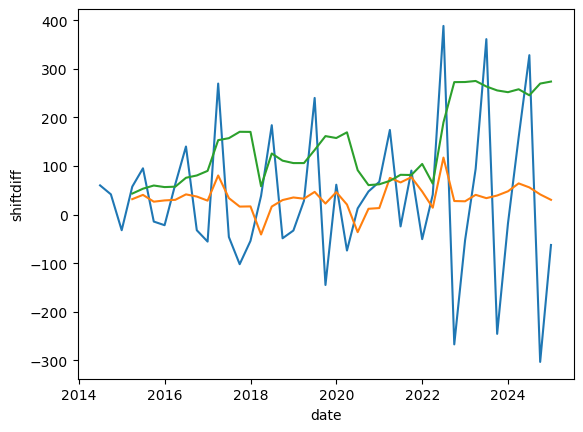

In [18]:
test_stationarity(air_df.dropna(), 'shiftdiff')

In [1]:
# log_df = df[['sales']]
# log_df['log'] = np.log(log_df['sales'])
# log_df.head(5)


C:\Users\pavan kumar\AppData\Local\Temp\ipykernel_17960\4136227404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['logshiftDiff'] = log_df['log'] - log_df['log'].shift(1)
C:\Users\pavan kumar\AppData\Local\Temp\ipykernel_17960\3629385525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollmean'] = dataframe[var].rolling(window = 4).mean()
C:\Users\pavan kumar\AppData\Local\Temp\ipykernel_17960\3629385525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

Test Statistic                -7.984795e+00
p-value                        2.566090e-12
#lags used                     2.000000e+00
number of observations used    4.000000e+01
dtype: float64
criticality 1% : -3.6055648906249997
criticality 5% : -2.937069375
criticality 10% : -2.606985625


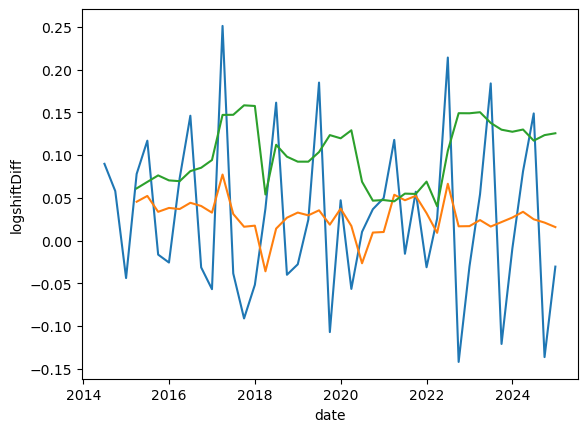

In [20]:
# log_df['logshiftDiff'] = log_df['log'] - log_df['log'].shift(1)
# log_df
# test_stationarity(log_df.dropna(),'logshiftDiff')

In [21]:
airp = df[['sales']].copy(deep = True)
airp['firstdiff'] = airp['sales'].diff()
airp['diff4'] = airp['sales'].diff(4)
airp.head()


,sales,firstdiff,diff4
date,,,
2014-03-31,642.07,NaN,NaN
2014-06-30,702.34,60.27,NaN
2014-09-30,744.17,41.83,NaN
2014-12-31,712.17,-32.00,NaN
2015-03-31,769.87,57.70,127.8


In [22]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

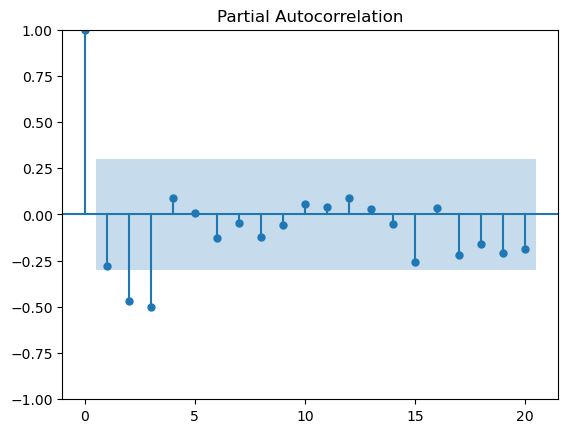

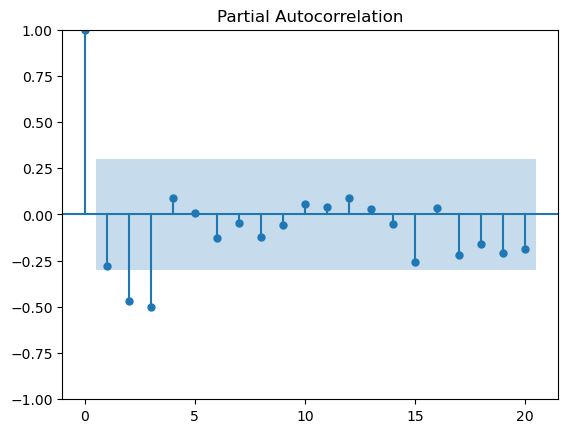

In [23]:
plot_pacf(airp['firstdiff'].dropna(),lags = 20)

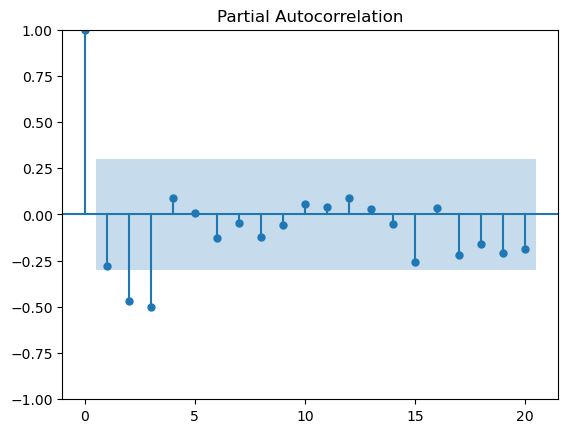

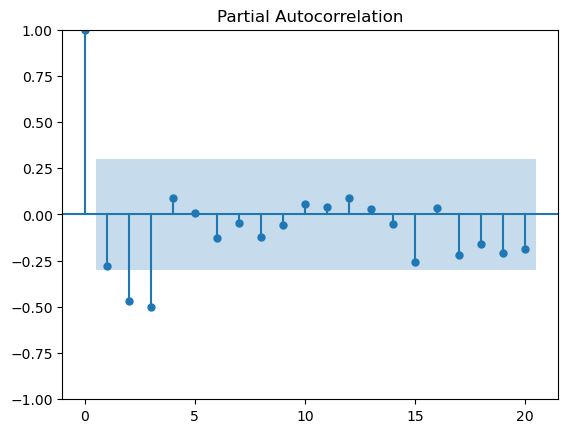

In [24]:
plot_pacf(airp['firstdiff'].dropna(),lags = 20)

In [25]:
#p=3,q=1,d=0


In [26]:
train = airp[:round(len(airp)*60/100)]

In [27]:
test = airp[round(len(airp)*60/100):]

In [46]:
model = ARIMA(train['sales'],order = (2,1,1))
model_fit = model.fit()
prediction = model_fit.predict(start = test.index[0],end = test.index[-1])
airp['arimapred'] = prediction

C:\Users\pavan kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\pavan kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\pavan kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='date', ylabel='sales'>

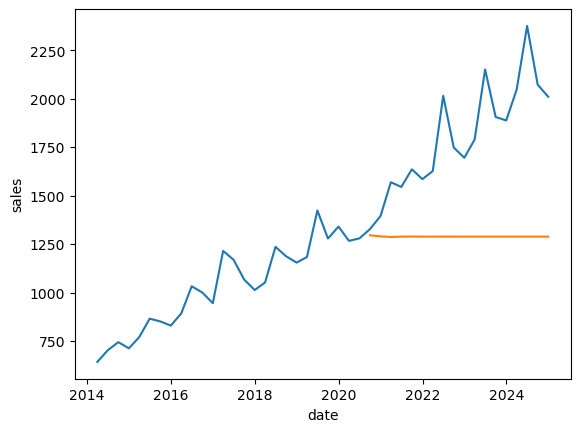

In [47]:
airp.dropna()
sns.lineplot(data = airp,x=airp.index,y = 'sales')
sns.lineplot(data = airp,x=airp.index,y = 'arimapred')

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
np.sqrt(mean_squared_error(test['sales'],prediction))

577.745924260266

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

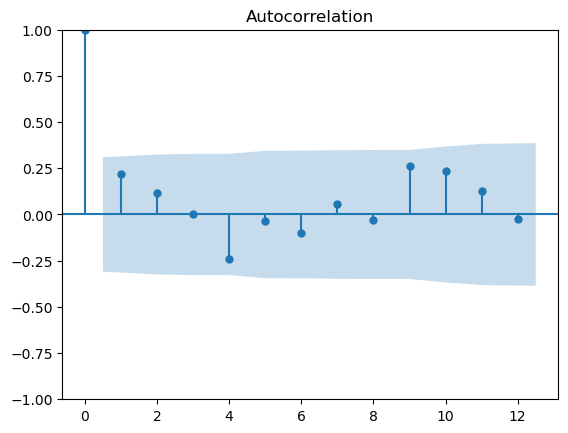

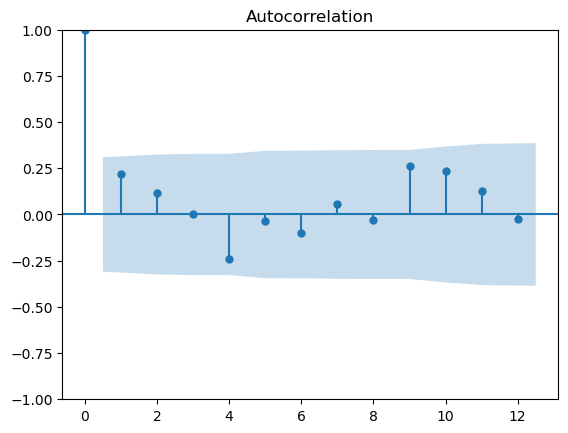

In [51]:
# plot_pacf(airp['diff4'].dropna(),lags = 12)
plot_acf(airp['diff4'].dropna(),lags =12)

In [52]:
# model = SARIMAX(train['sales'],order = (3,1,2),seasonal_order=(3, 1, 2, 4))
# model_fit = model.fit()
# start = len(train)
# end = len(train) + len(test) - 1
# prediction = model_fit.predict(start=start, end=end)
# airp.loc[test.index, 'sarimaxpred'] = prediction.values
model = SARIMAX(train['sales'],order = (2,1,1),seasonal_order=(2,1,1,4))
model_fit = model.fit()
prediction = model_fit.predict(start = test.index[0],end = test.index[-1])
airp['sarimaxpred'] = prediction

C:\Users\pavan kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\pavan kumar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\pavan kumar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='date', ylabel='sales'>

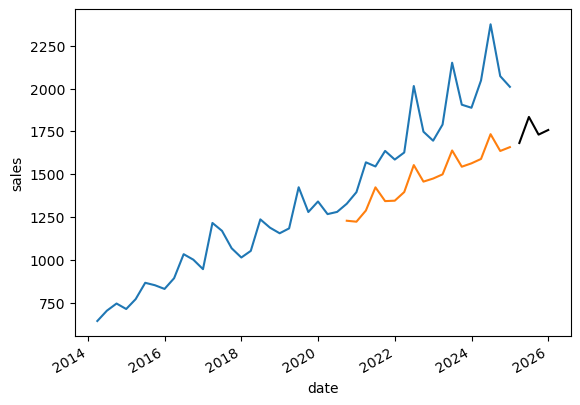

In [53]:
airp.dropna()
sns.lineplot(data = airp, x = airp.index ,y = 'sales')
sns.lineplot(data = airp, x = airp.index ,y = 'sarimaxpred')

model_fit.predict(start = futuredate.index[0],end = futuredate.index[-1]).plot(color = 'black')


<Axes: xlabel='date', ylabel='sarimaxpred'>

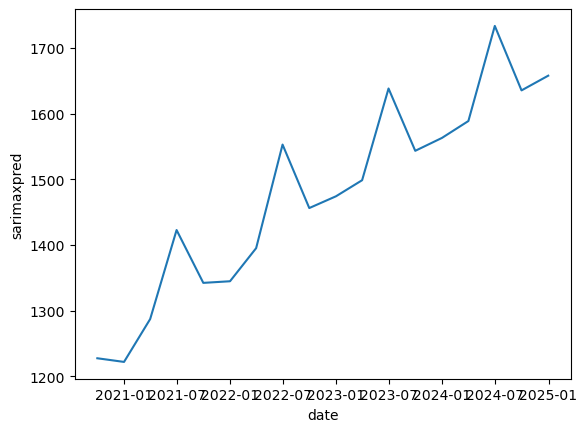

In [54]:
sns.lineplot(data = airp, x = airp.index ,y = 'sarimaxpred')

In [55]:
futuredate = pd.DataFrame([
    {'date': '2025-03-31'},
    {'date': '2025-06-30'},
    {'date': '2025-09-30'},
    {'date': '2025-12-31'}
])

futuredate['date'] = pd.to_datetime(futuredate['date'])
futuredate.set_index('date', inplace=True)


In [56]:
df.head()

,sales,trend,rollmean,rollstd
date,,,,
2014-03-31,642.07,NaN,NaN,NaN
2014-06-30,702.34,NaN,NaN,NaN
2014-09-30,744.17,716.16250,NaN,NaN
2014-12-31,712.17,752.50375,700.1875,42.662699
2015-03-31,769.87,786.23625,732.1375,30.849715


In [57]:
futuredate

""
date
2025-03-31
2025-06-30
2025-09-30
2025-12-31


In [36]:
# import pmdarima as pm

In [37]:
# model = pm.auto_arima(
#     airp['sales'],          # the time series
#     seasonal=False,         # use True for SARIMA (we're doing ARIMA now)
#     stepwise=True,          # faster search
#     trace=True,             # show progress
#     suppress_warnings=True, # cleaner output
#     error_action='ignore'   # skip errors
# )

In [38]:
# print(model.summary())

In [ ]:
# log_df2 = log_df[['sales','log']]
# log_df2['log_sqrt'] = np.sqrt(log_df2['log'])
# log_df2['logshiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift(1)
# log_df2['logshiftDiff'] = log_df2['log_sqrt'].diff()
# log_df2.head()


In [ ]:
# test_stationarity(log_df2.dropna(),'logshiftDiff')